# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

do in two ways
naive way
measure cross validated performance, optimum will change, cross validation optimum should give smoother classifier, smaller margin, less slack.

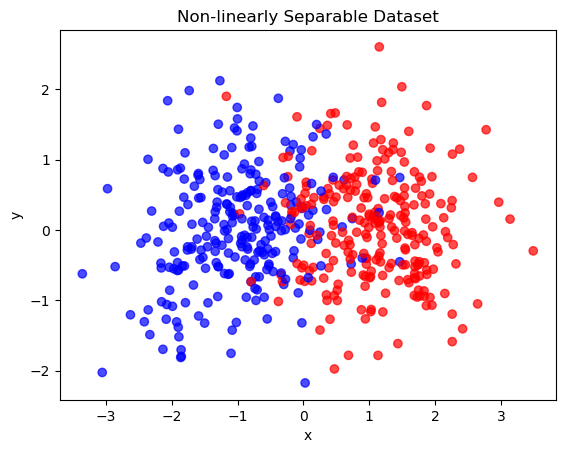

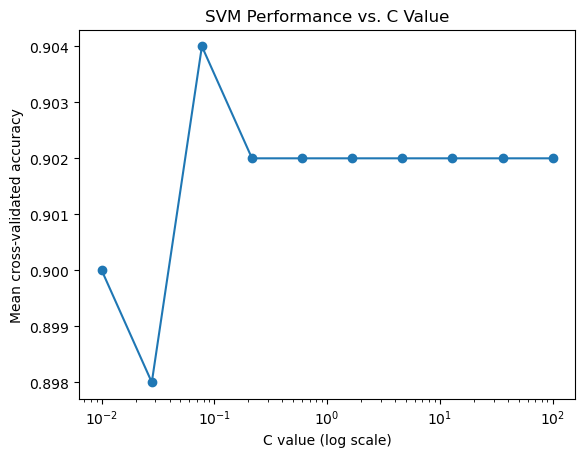

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Generate a non-linearly separable dataset
X, y = make_blobs(n_samples=500,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

# Plot the dataset to visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Non-linearly Separable Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Define a range of C values to test
C_values = np.logspace(-2, 2, 10)

# Store the mean accuracy for each C value
mean_accuracies = []

# Evaluate the model performance for each C value using cross-validation
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
    mean_accuracies.append(scores.mean())

# Find the best C value
best_C = C_values[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)

# Plot the accuracy as a function of C
plt.plot(C_values, mean_accuracies, marker='o')
plt.xscale('log')
plt.xlabel("C value (log scale)")
plt.ylabel("Mean cross-validated accuracy")
plt.title("SVM Performance vs. C Value")
plt.show()


In [31]:
print(f"Best C value: {best_C}")
print(f"Best cross-validated accuracy: {best_accuracy}")

Best C value: 0.0774263682681127
Best cross-validated accuracy: 0.9039999999999999


The first plot shows the data generated by the make.blobs function. It displays non linearly seperable datapoints of 2 features. n = 500 datapoints, cluster std = 0.8.
The second plot shows the SVM performance, as calculated by the mean cross validation accuracy, against the C hyperparameter value. The best cross validated accuracy and c hyperparameter value are printed above. 

The control parameter C in SVM's helps to control trade-off between training error and the margin, since it can determine the penalty for missclassified datapoints during the training process. 
A smaller C allows for more misclassification in the data.
A higher C results in a narrow margin, causing the training data to be fit as accurately as possible. This is beneficial if data points are not linearly seperable. But making C too large can risk in overfitting. 

source; baeldung.com/cs/ml-svm-c-parameter

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [33]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [34]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [35]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
